In [1]:

%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns

import geopandas as gpd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"
path_figs = os.getcwd() +"\\..\\Figures\\" 

# path_figs = path_figs + "Immunity_SSI\\"

In [3]:
gdf = gpd.read_file(rootdir_data+'Kommune\\Kommune.shp')

# Only use most recent mapdata
gdf = gdf[gdf.til == np.max(gdf.til.unique())]

In [4]:
df_meas = pd.read_csv('KommuneMeasure.csv')

In [5]:
# Test of colorrange
posVals = np.arange(-7,8,2)

import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
[cmap(x/7) for x in posVals]

cmap = matplotlib.cm.get_cmap('Spectral',len(posVals))

cmap(7)
posVals 
df_meas.iloc[:,1:].transpose().iloc[:,0].values

array([-1.62826328e-01, -2.65699664e-01, -9.28197125e-02, -2.64315764e-01,
        1.38901918e-01,  5.81403971e-02, -2.52696270e-01, -9.48068583e-02,
       -1.06863807e-01,  8.08943461e-03, -1.91505472e-01, -5.28512656e-02,
       -2.72251868e-01,  5.18893670e-02,  9.33247429e-02, -3.67862825e-01,
       -8.31786182e-02, -1.55985711e-01, -2.89115641e-01, -1.01333557e-01,
       -1.58670974e-01, -3.85548553e-02,  2.08685258e-01,  2.25193964e-01,
       -9.85593679e-02, -1.20772229e-01,  7.76568044e-02, -6.28001165e-03,
       -2.80650678e-01, -2.63933170e-01, -3.26257543e-01, -3.39895072e-01,
       -1.45530131e-01, -3.60089227e-01, -1.66519457e-01, -1.29404373e-01,
       -1.00914450e-01, -7.50196817e-02, -8.52000645e-02, -7.82833952e-02,
       -2.42241225e-01,  2.95505484e-02, -4.25142275e-02,  1.01850543e-04,
       -2.22134032e-01, -1.92854550e-01,  1.42939199e-01,  1.54210312e-01,
        1.45212854e-01, -8.67857260e-03,  7.83407281e-02,  1.36829672e-01,
        1.88389554e-01,  

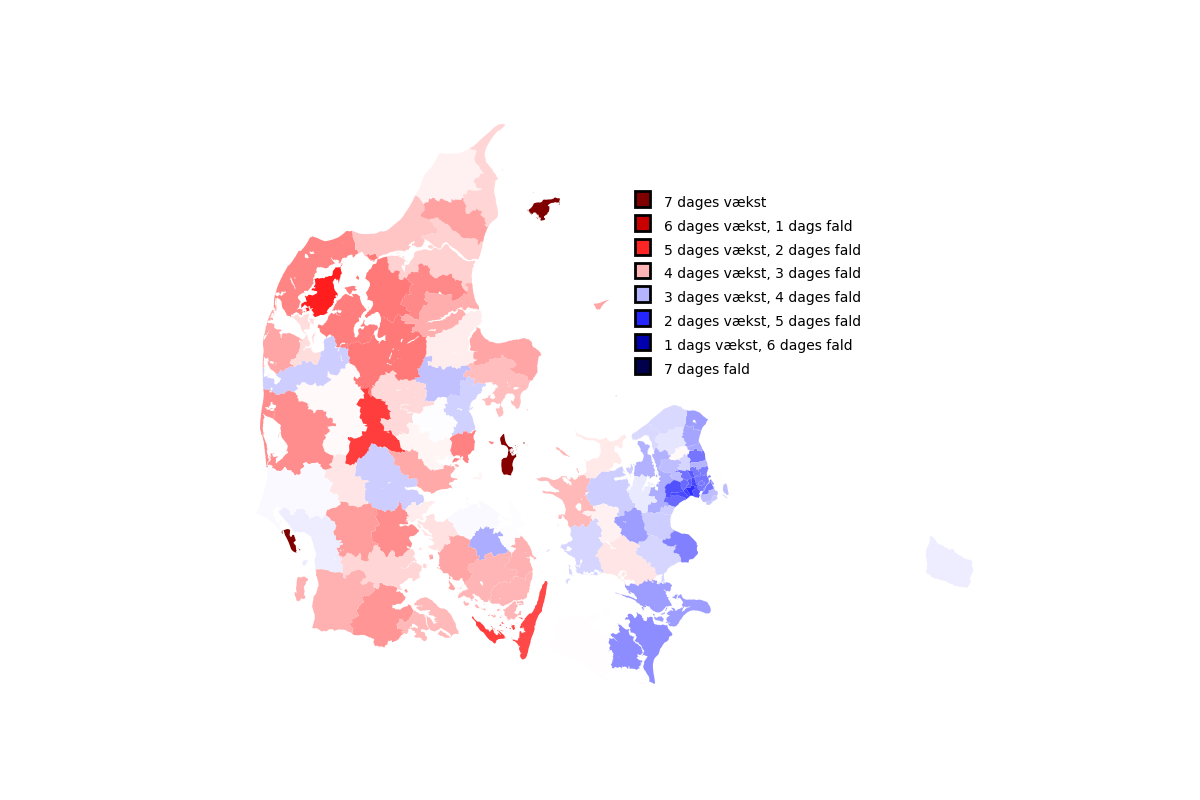

In [6]:
allKoms = df_meas.columns[1:]
# [x.split(' Kommun')[0] for x in gdf.navn]

fig,ax1 = plt.subplots() 
# gdf.plot(color='gray',ax=ax1)

# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf.navn):
#     ax1.annotate(label,xy=(x,y),xytext=(3,3),textcoords="offset points")

cmap = matplotlib.cm.get_cmap('seismic')
# cmap = matplotlib.cm.get_cmap('seismic')

for curKom in allKoms:
    # curKom = 'Horsens'

        
    curVal = df_meas[curKom].values[0]
    curVal = (1+df_meas[curKom].values[0])/2
    # curVal = (1+2*df_meas[curKom].values[0])/2
    # if (curVal >= 0):
    #     curColor = [curVal,0.1,0]
    # else:
    #     curColor = [-curVal/4,-curVal/4,-curVal]
    # # curColor = [0.5+curVal/2,0,0.5-curVal/2]

    # [cmap(x/7) for x in posVals]
    curColor = cmap(curVal)
    
    if (curKom == 'Aabenraa'):
        curKom = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKom = 'Nordfyns'
    if (curKom == 'København'):
        curKom = 'Københavns'
    if (curKom == 'Bornholm'):
        curKom = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKom = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKom = 'Lyngby-Tårbæk'
        

    curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    curgdf.plot(ax=ax1,color=curColor)

# Hand-crafted legend
import matplotlib.patches as patches
# posVals = np.arange(-7,8,2)
posVals = np.arange(-1,1.1,2/7)
posValsStr = [str(int(np.round(7*x))) for x in posVals]
posValsStr = [
    '7 dages vækst',
    '6 dages vækst, 1 dags fald',
    '5 dages vækst, 2 dages fald',
    '4 dages vækst, 3 dages fald',
    '3 dages vækst, 4 dages fald',
    '2 dages vækst, 5 dages fald',
    '1 dags vækst, 6 dages fald',
    '7 dages fald',
]

for i in range(len(posVals)):
    curVal = posVals[i]
    curVal = 1-(1+posVals[i])/2
    curColor = cmap(curVal)
    curStr = posValsStr[i]
    x0 = 680000
    y0 = 6.35e6
    wi = 9000
    he = 10000
    cury = y0-he*i -he*0.5*i
    rect = patches.Rectangle((x0,cury),wi,he,linewidth=2,edgecolor='k',facecolor=curColor)
    ax1.add_patch(rect)
    # ax1.annotate('asdf',xy=(x0,y0))
    ax1.text(x0+wi*2,cury,curStr,ha='left')

# Remove axes
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.set_title('')

if saveFigures:
    fig.savefig(path_figs+'/Maps/KommuneUdvikling')
    curDate = np.datetime64('today')
    fig.savefig(path_figs+f'/Maps/KommuneUdvikling_{curDate}')

# ax1.set_xlim([690000,750000])
# ax1.set_ylim([6.16e6,6.195e6])


# for i in range(len(posVals)):
#     curVal = posVals[i]
#     curVal = 1-(1+posVals[i])/2
#     curColor = cmap(curVal)
#     curStr = posValsStr[i]
#     x0 = 735000
#     y0 = 6.18e6
#     wi = 9000/4
#     he = 10000/6
#     cury = y0-he*i -he*0.5*i
#     rect = patches.Rectangle((x0,cury),wi,he,linewidth=2,edgecolor='k',facecolor=curColor)
#     ax1.add_patch(rect)
#     # ax1.annotate('asdf',xy=(x0,y0))
#     ax1.text(x0+wi*2,cury,curStr,ha='left')

# if saveFigures:
#     fig.savefig(path_figs+'/Maps/KommuneUdvikling_Hovedstaden')

In [7]:
np.sort(allKoms)

array(['Aabenraa', 'Aalborg', 'Albertslund', 'Allerød', 'Assens',
       'Ballerup', 'Billund', 'Bornholm', 'Brøndby', 'Brønderslev',
       'Dragør', 'Egedal', 'Esbjerg', 'Faaborg-Midtfyn', 'Fanø',
       'Favrskov', 'Faxe', 'Fredensborg', 'Fredericia', 'Frederiksberg',
       'Frederikshavn', 'Frederikssund', 'Furesø', 'Gentofte', 'Gladsaxe',
       'Glostrup', 'Greve', 'Gribskov', 'Guldborgsund', 'Haderslev',
       'Halsnæs', 'Hedensted', 'Helsingør', 'Herlev', 'Herning',
       'Hillerød', 'Hjørring', 'Holbæk', 'Holstebro', 'Horsens',
       'Hvidovre', 'Høje Tåstrup', 'Hørsholm', 'Ikast-Brande', 'Ishøj',
       'Jammerbugt', 'Kalundborg', 'Kerteminde', 'Kolding', 'København',
       'Køge', 'Langeland', 'Lejre', 'Lemvig', 'Lolland',
       'Lyngby-Taarbæk', 'Læsø', 'Mariagerfjord', 'Middelfart', 'Morsø',
       'Norddjurs', 'Nordfyn', 'Nyborg', 'Næstved', 'Odder', 'Odense',
       'Odsherred', 'Randers', 'Rebild', 'Ringkøbing-Skjern', 'Ringsted',
       'Roskilde', 'Rudersdal', '

# Make a new figure, but with explanations
First, method from Kommune_Progression is repeated

In [8]:

# Walk to relavant folder
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir
df_07 = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',encoding='latin1',delimiter = ';')

df_07['Dato'] = pd.to_datetime(df_07['Dato'])

In [9]:
def getKommuneCount(curKommune):
    kommune_df = df_07.loc[df_07["Kommunenavn"] == curKommune]
    
    # Cut out last data point
    kommune_df = kommune_df.iloc[:-1,:]
    # firstDate = np.datetime64(kommune_df.loc[kommune_df.index[0],'Dato'])-np.timedelta64(1,'D')
    # firstDate = np.datetime64('2021-11-01')
    # lastDate = np.datetime64(kommune_df.loc[kommune_df.index[-1],'Dato'])
    # Find number of citizens in region
    latestsubdir = list(os.walk(path_dash))[0][1][-1]
    latestdir = path_dash + latestsubdir
    df_kommunekort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',encoding='latin1',
                                 delimiter = ';')
    df_kommunekort = df_kommunekort.set_index("Kommunenavn")

    # kommune_nr = kommune_df.Kommune.iloc[0]
    # kommune_df['Procent andel smittede'] = (kommune_df['Bekræftede tilfælde']/antal_borgere(curKommune))*100

    curDays = kommune_df['Dato'].values
    antal_borgere = df_kommunekort["Antal borgere"][curKommune]
    curPerc = ((kommune_df['Bekræftede tilfælde']/antal_borgere)*100).values
    curCount = kommune_df['Bekræftede tilfælde'].values 
    
    indexToUse = curDays <= (np.datetime64(latestsubdir[-10:])-np.timedelta64(2,'D'))
    curCount = curCount[indexToUse]
    curPerc = curPerc[indexToUse]
    curDays = curDays[indexToUse]

    return curDays,curCount,curPerc


KeyError: 'Bekræftede tilfælde'

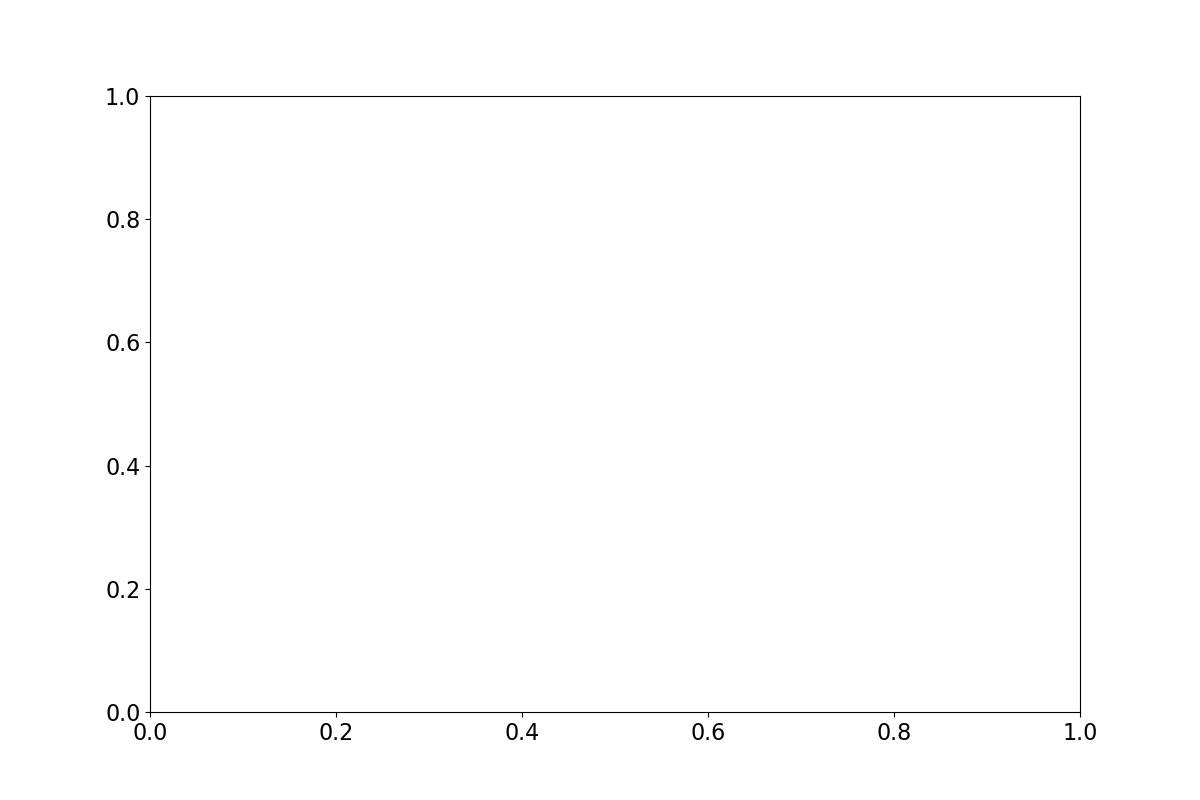

In [10]:
def makeSmallPlot(ax1,curKommuneNavn):
    curDays,curCount,curPerc = getKommuneCount(curKommuneNavn)
    firstDateToShow = np.datetime64('today') - np.timedelta64(20,'D')
    firstIndex = np.where(curDays == firstDateToShow)[0][0]
    ax1.plot(curDays[firstIndex:],curCount[firstIndex:],'k*:',linewidth=1,label='Data')
    # ax1.plot(rnTime(curDays[firstIndex-4:],7),rnMean(curCount[firstIndex-4:],7),'k',linewidth=3,label='7-dages gennemsnit')

    i = 0

    NotYetShown_down = True
    NotYetShown_up = True

    for i in range(0,8):

        curD1 = curDays[-7-1-i]
        curD2 = curDays[-1-i]
        curY1 = curCount[-7-1-i]
        curY2 = curCount[-1-i]

        dY = curY2-curY1

        if (dY >= 0):
            curColor = 'r'
            curLabel = NotYetShown_up * 'Vækst'
            ax1.plot([curD1,curD2],[curY1,curY2],color=curColor,label=curLabel)

            NotYetShown_up = False 
        else:
            curColor = 'b'
            curLabel = NotYetShown_down * 'Fald'
            ax1.plot([curD1,curD2],[curY1,curY2],color=curColor,label=curLabel)
            NotYetShown_down = False


        # ax1.plot([curDays[-7-1-i],curDays[-1-i]],[curCount[-1-7-i],curCount[-1-i]])

        # ax1.set_ylim(bottom=0)

    ax1.set_xlim(left=firstDateToShow)
    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
            curSunday = firstSunday + np.timedelta64(7*k,'D')
            ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    # ax1.grid(axis='y')

    ax1.plot(curDays[firstIndex:],curCount[firstIndex:],'k*:',linewidth=1)

    ax1.legend(loc='upper left')

    ax1.set_ylabel('Antal smittetilfælde')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax1.set_title(curKommuneNavn)


fig,ax1 = plt.subplots()

curKommuneNavn = 'København'
makeSmallPlot(ax1,curKommuneNavn)

fig.savefig(path_figs+'Maps/MeasureExample')

In [ ]:
def makeSmallPlotSmall(ax1,curKommuneNavn):
    curDays,curCount,curPerc = getKommuneCount(curKommuneNavn)
    firstDateToShow = np.datetime64('today') - np.timedelta64(20,'D')
    firstIndex = np.where(curDays == firstDateToShow)[0][0]
    ax1.plot(curDays[firstIndex:],curCount[firstIndex:],'k*:',linewidth=1,markersize=2,label='Data')
    # ax1.plot(rnTime(curDays[firstIndex-4:],7),rnMean(curCount[firstIndex-4:],7),'k',linewidth=3,label='7-dages gennemsnit')

    i = 0

    NotYetShown_down = True
    NotYetShown_up = True

    for i in range(0,8):

        curD1 = curDays[-7-1-i]
        curD2 = curDays[-1-i]
        curY1 = curCount[-7-1-i]
        curY2 = curCount[-1-i]

        dY = curY2-curY1

        if (dY >= 0):
            curColor = 'r'
            curLabel = NotYetShown_up * 'Vækst'
            ax1.plot([curD1,curD2],[curY1,curY2],linewidth=2,color=curColor,label=curLabel)

            NotYetShown_up = False 
        else:
            curColor = 'b'
            curLabel = NotYetShown_down * 'Fald'
            ax1.plot([curD1,curD2],[curY1,curY2],linewidth=2,color=curColor,label=curLabel)
            NotYetShown_down = False


        # ax1.plot([curDays[-7-1-i],curDays[-1-i]],[curCount[-1-7-i],curCount[-1-i]])

        # ax1.set_ylim(bottom=0)

    ax1.set_xlim(left=firstDateToShow)
    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
            curSunday = firstSunday + np.timedelta64(7*k,'D')
            ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    # ax1.grid(axis='y')

    ax1.plot(curDays[firstIndex:],curCount[firstIndex:],'k*:',linewidth=1,markersize=6)

    # ax1.legend(loc='upper left',fontsize=6)

    # ax1.set_ylabel('Antal smittetilfælde')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

    textFontSize= 6
    ax1.set_title(curKommuneNavn,fontsize=textFontSize+4)
    ax1.tick_params(axis='both', which='major', labelsize=textFontSize)
    ax1.tick_params(axis='both', which='minor', labelsize=textFontSize)
    # ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=6)

    curYlim = ax1.get_ylim()
    ax1.set_ylim([curYlim[0]*0.8,curYlim[1]*1.2])


fig,ax1 = plt.subplots()

curKommuneNavn = 'København'
makeSmallPlotSmall(ax1,curKommuneNavn)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

allKoms = df_meas.columns[1:]
# [x.split(' Kommun')[0] for x in gdf.navn]

fig,ax1 = plt.subplots(figsize=(15,15)) 
# gdf.plot(color='gray',ax=ax1)

# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf.navn):
#     ax1.annotate(label,xy=(x,y),xytext=(3,3),textcoords="offset points")

cmap = matplotlib.cm.get_cmap('seismic')

for curKom in allKoms:
    # curKom = 'Horsens'

        
    curVal = df_meas[curKom].values[0]
    curVal = (1+df_meas[curKom].values[0])/2
    # if (curVal >= 0):
    #     curColor = [curVal,0.1,0]
    # else:
    #     curColor = [-curVal/4,-curVal/4,-curVal]
    # # curColor = [0.5+curVal/2,0,0.5-curVal/2]

    # [cmap(x/7) for x in posVals]
    curColor = cmap(curVal)
    
    if (curKom == 'Aabenraa'):
        curKom = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKom = 'Nordfyns'
    if (curKom == 'København'):
        curKom = 'Københavns'
    if (curKom == 'Bornholm'):
        curKom = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKom = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKom = 'Lyngby-Tårbæk'
        

    curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    curgdf.plot(ax=ax1,color=curColor)

# Hand-crafted legend
import matplotlib.patches as patches
# posVals = np.arange(-7,8,2)
posVals = np.arange(-1,1.1,2/7)
posValsStr = [str(int(np.round(7*x))) for x in posVals]
posValsStr = [
    '7 dages vækst',
    '6 dages vækst, 1 dags fald',
    '5 dages vækst, 2 dages fald',
    '4 dages vækst, 3 dages fald',
    '3 dages vækst, 4 dages fald',
    '2 dages vækst, 5 dages fald',
    '1 dags vækst, 6 dages fald',
    '7 dages fald',
]

for i in range(len(posVals)):
    curVal = posVals[i]
    curVal = 1-(1+posVals[i])/2
    curColor = cmap(curVal)
    curStr = posValsStr[i]
    # x0 = 680000
    # y0 = 6.35e6
    x0 = 630000
    y0 = 6.4e6
    wi = 9000
    he = 10000
    cury = y0-he*i -he*0.5*i
    rect = patches.Rectangle((x0,cury),wi,he,linewidth=2,edgecolor='k',facecolor=curColor)
    ax1.add_patch(rect)
    # ax1.annotate('asdf',xy=(x0,y0))
    ax1.text(x0+wi*2,cury,curStr,ha='left')

# Remove axes
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Make inset plots with description
insetW = 50000
insetH = 0.07e6

curKom = 'Albertslund'
curx0 = 750000
cury0 = 6.2e6
                #    bbox_to_anchor=(680000,6.35e6,685000,6.5e6),
axins = inset_axes(ax1, width=2, height=1,
                   bbox_to_anchor=(curx0,cury0,curx0+insetW,cury0+insetH),
                   bbox_transform=ax1.transData, loc=3)
makeSmallPlotSmall(axins,curKom)
bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
plt.setp(axins.get_xticklabels(), bbox=bbox)
plt.setp(axins.get_yticklabels(), bbox=bbox)
curgdf = gdf[gdf.navn == (curKom+' Kommune')]
ax1.plot([curx0 + insetW/2,curgdf.geometry.centroid.x ],[cury0 + insetH / 2, curgdf.geometry.centroid.y ],'k')


curKom = 'København'
curx0 = 750000
cury0 = 6.1e6
                #    bbox_to_anchor=(680000,6.35e6,685000,6.5e6),
axins = inset_axes(ax1, width=2, height=1,
                   bbox_to_anchor=(curx0,cury0,curx0+insetW,cury0+insetH),
                   bbox_transform=ax1.transData, loc=3)
makeSmallPlotSmall(axins,curKom)
bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
plt.setp(axins.get_xticklabels(), bbox=bbox)
plt.setp(axins.get_yticklabels(), bbox=bbox)
curgdf = gdf[gdf.navn == (curKom+'s Kommune')]
ax1.plot([curx0 + insetW/2,curgdf.geometry.centroid.x ],[cury0 + insetH / 2, curgdf.geometry.centroid.y ],'k')


curKom = 'Guldborgsund'
curx0 = 730000
cury0 = 6e6
                #    bbox_to_anchor=(680000,6.35e6,685000,6.5e6),
axins = inset_axes(ax1, width=2, height=1,
                   bbox_to_anchor=(curx0,cury0,curx0+insetW,cury0+insetH),
                   bbox_transform=ax1.transData, loc=3)
makeSmallPlotSmall(axins,curKom)
bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
plt.setp(axins.get_xticklabels(), bbox=bbox)
plt.setp(axins.get_yticklabels(), bbox=bbox)
curgdf = gdf[gdf.navn == (curKom+' Kommune')]
ax1.plot([curx0 + insetW/2,curgdf.geometry.centroid.x ],[cury0 + insetH / 2, curgdf.geometry.centroid.y ],'k')

curKom = 'Aalborg'
curx0 = 420000
cury0 = 6.35e6
                #    bbox_to_anchor=(680000,6.35e6,685000,6.5e6),
axins = inset_axes(ax1, width=2, height=1,
                   bbox_to_anchor=(curx0,cury0,curx0+insetW,cury0+insetH),
                   bbox_transform=ax1.transData, loc=3)
# axins.set_facecolor('xkcd:off white')
makeSmallPlotSmall(axins,curKom)
bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
plt.setp(axins.get_xticklabels(), bbox=bbox)
plt.setp(axins.get_yticklabels(), bbox=bbox)
# bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
# plt.setp(axins.get_yticklabels(), bbox=bbox)
curgdf = gdf[gdf.navn == (curKom+' Kommune')]
ax1.plot([curx0 + insetW/2,curgdf.geometry.centroid.x ],[cury0 + insetH / 2, curgdf.geometry.centroid.y ],'k')



curKom = 'Vejle'
curx0 = 330000
cury0 = 6.23e6
                #    bbox_to_anchor=(680000,6.35e6,685000,6.5e6),
axins = inset_axes(ax1, width=2, height=1,
                   bbox_to_anchor=(curx0,cury0,curx0+insetW,cury0+insetH),
                   bbox_transform=ax1.transData, loc=3)
# axins.set_facecolor('xkcd:off white')
makeSmallPlotSmall(axins,curKom)
bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
plt.setp(axins.get_xticklabels(), bbox=bbox)
plt.setp(axins.get_yticklabels(), bbox=bbox)
# bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
# plt.setp(axins.get_yticklabels(), bbox=bbox)
curgdf = gdf[gdf.navn == (curKom+' Kommune')]
ax1.plot([curx0 + insetW/2,curgdf.geometry.centroid.x ],[cury0 + insetH / 2, curgdf.geometry.centroid.y ],'k')


curKom = 'Kolding'
curx0 = 330000
cury0 = 6.1e6
                #    bbox_to_anchor=(680000,6.35e6,685000,6.5e6),
axins = inset_axes(ax1, width=2, height=1,
                   bbox_to_anchor=(curx0,cury0,curx0+insetW,cury0+insetH),
                   bbox_transform=ax1.transData, loc=3)
# axins.set_facecolor('xkcd:off white')
makeSmallPlotSmall(axins,curKom)
bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
plt.setp(axins.get_xticklabels(), bbox=bbox)
plt.setp(axins.get_yticklabels(), bbox=bbox)
# bbox = dict(boxstyle="round", ec="white", fc="white", alpha=1)
# plt.setp(axins.get_yticklabels(), bbox=bbox)
curgdf = gdf[gdf.navn == (curKom+' Kommune')]
ax1.plot([curx0 + insetW/2,curgdf.geometry.centroid.x ],[cury0 + insetH / 2, curgdf.geometry.centroid.y ],'k')


fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax1.set_xlim(left=350000)

if saveFigures:
    fig.savefig(path_figs+'/Maps/KommuneUdvikling_Forklaring')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\ProgramData\Anaconda3\envs\main\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\ProgramData\Anaconda3\envs\main\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [ ]:
curgdf.geometry

158    MULTIPOLYGON Z (((518024.649 6137991.125 0.000...
Name: geometry, dtype: geometry

# Map of local immunity

In [ ]:
curgdf = gdf.copy()
curgdf['TotalImmunity'] = np.zeros((len(curgdf,)))
curgdf.head()

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry,TotalImmunity
0,105388.0,Horsens Kommune,121077.0,2007-01-01,9999-12-31,64.0,Kommune,246469.100007,5.191999e+08,MULTIPOLYGON Z (((585139.647 6187541.974 0.000...,0.0
1,105384.0,Vejle Kommune,121073.0,2007-01-01,9999-12-31,64.0,Kommune,237518.089342,1.058254e+09,MULTIPOLYGON Z (((544840.271 6163582.786 0.000...,0.0
2,105385.0,Åbenrå Kommune,121074.0,2007-01-01,9999-12-31,64.0,Kommune,217483.507697,9.407096e+08,MULTIPOLYGON Z (((511855.887 6079619.361 0.000...,0.0
3,105386.0,Favrskov Kommune,121075.0,2007-01-01,9999-12-31,64.0,Kommune,185712.187147,5.402442e+08,MULTIPOLYGON Z (((548072.263 6238876.656 0.000...,0.0
4,105387.0,Hedensted Kommune,121076.0,2007-01-01,9999-12-31,64.0,Kommune,201591.999558,5.511563e+08,MULTIPOLYGON Z (((567515.496 6188130.593 0.000...,0.0


In [ ]:

# fig,ax1 = plt.subplots(figsize=(15,15)) 

# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf.navn):
#     ax1.annotate(label,xy=(x,y),xytext=(3,3),textcoords="offset points")

# cmap = matplotlib.cm.get_cmap('seismic')

for curKom in allKoms:
        
    curDays,curCount,curPerc = getKommuneCount(curKom)

    firstDate = np.datetime64('2021-12-15')
    # firstDate = np.datetime64('2021-09-01')
    curCount = curCount[curDays >= firstDate]
    curPerc = curPerc[curDays >= firstDate]
    curDays = curDays[curDays >= firstDate]

    curVal = np.cumsum(curPerc)[-1]

    # [cmap(x/7) for x in posVals]
    curColor = cmap(curVal)
    
    if (curKom == 'Aabenraa'):
        curKom = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKom = 'Nordfyns'
    if (curKom == 'København'):
        curKom = 'Københavns'
    if (curKom == 'Bornholm'):
        curKom = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKom = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKom = 'Lyngby-Tårbæk'
        
    curgdf.loc[curgdf.navn == (curKom+' Kommune'),'TotalImmunity'] = curVal

    # curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    # curgdf.plot(ax=ax1,color=curColor)

    
# curgdf.head()

In [ ]:


# import matplotlib

fig,ax1 = plt.subplots(figsize=(15,15)) 

divider = make_axes_locatable(ax1)
cax = divider.append_axes("left", size="5%", pad=0.05)

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')

# cmap = matplotlib.cm.get_cmap('cividis')
vmax = np.round(curgdf.TotalImmunity.max()/5)*5 + 5
curRangeToShow = np.arange(0,vmax,2.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:purple","xkcd:light gray","xkcd:orange"],N=len(curRangeToShow))
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:red","xkcd:light gray","b"],N=len(curRangeToShow))
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","k","xkcd:green"],N=len(curRangeToShow))
curgdf.plot(ax=ax1,column = 'TotalImmunity',cmap=cmap,vmax=vmax,legend=True, cax=cax)
curgdf.plot(ax=ax1,column = 'TotalImmunity',cmap=cmap,vmax=vmax,vmin=10,legend=True, cax=cax)


# Remove axes
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.set_title('Naturlig immunitet fra Omikron smitte, samlet befolkning')
cax.yaxis.set_label_position("left")
cax.yaxis.tick_left()
textFirstDate = pd.to_datetime(firstDate).strftime('%#d. %B %Y')
textLastDate = pd.to_datetime(np.datetime64('today')).strftime('%#d. %B %Y')
cax.set_ylabel(f'Andel af befolkning smittet siden {textFirstDate} [%]')
ax1.set_title(f'Andel af befolkning smittet fra {textFirstDate} til {textLastDate}\nBaseret på PCR-positive resultater, ikke test-justeret')

fig.savefig(path_figs+f'Maps\\Kommune_Total')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# curgdf.loc[curgdf.navn == (curKom+' Kommune'),'TotalImmunity'] = 10
curgdf.head()

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry,TotalImmunity
0,105388.0,Horsens Kommune,121077.0,2007-01-01,9999-12-31,64.0,Kommune,246469.100007,5.191999e+08,MULTIPOLYGON Z (((585139.647 6187541.974 0.000...,18.952877
1,105384.0,Vejle Kommune,121073.0,2007-01-01,9999-12-31,64.0,Kommune,237518.089342,1.058254e+09,MULTIPOLYGON Z (((544840.271 6163582.786 0.000...,20.096374
2,105385.0,Åbenrå Kommune,121074.0,2007-01-01,9999-12-31,64.0,Kommune,217483.507697,9.407096e+08,MULTIPOLYGON Z (((511855.887 6079619.361 0.000...,17.998601
3,105386.0,Favrskov Kommune,121075.0,2007-01-01,9999-12-31,64.0,Kommune,185712.187147,5.402442e+08,MULTIPOLYGON Z (((548072.263 6238876.656 0.000...,21.600556
4,105387.0,Hedensted Kommune,121076.0,2007-01-01,9999-12-31,64.0,Kommune,201591.999558,5.511563e+08,MULTIPOLYGON Z (((567515.496 6188130.593 0.000...,17.661062


In [ ]:

# curDays,curCount,curPerc = getKommuneCount('Horsens')

# firstDate = np.datetime64('2021-12-01')
# # firstDate = np.datetime64('2021-09-01')
# curCount = curCount[curDays >= firstDate]
# curPerc = curPerc[curDays >= firstDate]
# curDays = curDays[curDays >= firstDate]

# fig,ax1 = plt.subplots()
# ax1.plot(curDays,np.cumsum(curPerc))

# Make the same map, but age-specific

Method for getting age-specific case-counts and incidence was made in Kommune_Alder.ipynb

In [ ]:
popdf1 = pd.read_csv(rootdir_data+'/DKfolketal2021_Statistikbanken_Del1.csv',header=None,encoding='latin1',delimiter=';')
popdf2 = pd.read_csv(rootdir_data+'/DKfolketal2021_Statistikbanken_Del2.csv',header=None,encoding='latin1',delimiter=';')

popdf = pd.concat([popdf1,popdf2])

popdf = popdf.rename(columns={0:"Kommune",1:'Alder',2:'Antal'})
popdf['AlderKort'] = popdf.Alder.apply(lambda x: int(str(x).split(' ')[0]))
totCounts = popdf.groupby('Kommune').sum()

In [ ]:
def getPopSize(kommuneNavn,minAlder=0,maxAlder=125):

    if (kommuneNavn == 'Høje Tåstrup'):
        kommuneNavn = 'Høje-Taastrup'
    if (kommuneNavn == 'Århus'):
        kommuneNavn = 'Aarhus'
    if (kommuneNavn == 'Nordfyn'):
        kommuneNavn = 'Nordfyns'
    if (kommuneNavn == 'Vesthimmerland'):
        kommuneNavn = 'Vesthimmerlands'

        
    return popdf[(popdf.Kommune == kommuneNavn) & (popdf.AlderKort >= minAlder) & (popdf.AlderKort <= maxAlder)].Antal.sum()
    

In [ ]:
allSubDirs = list(os.walk(path_dash))[0][1]

df = pd.DataFrame()

for curSubDir in allSubDirs:
    curdir = path_dash + curSubDir
    curfilepath = curdir+'/Kommunalt_DB/17_tilfaelde_fnkt_alder_kommuner.csv'

    # Check if file was included at the time. The "Kommune/17" file wasn't included until 2021-09-22 
    if os.path.isfile(curfilepath):
        curdf = pd.read_csv(curfilepath,encoding='latin1',delimiter = ';')
        
        df = pd.concat([df,curdf])

# Set dtypes
df.Kommune = df.Kommune.fillna(0)  # All NaN kommuner is set to zero
df['Kommune'] = df['Kommune'].astype(int)
df['Dagsdato'] = pd.to_datetime(df['Dagsdato'])
df['Bekræftede tilfælde'] = pd.to_numeric(df['Bekræftede tilfælde'])
df['Aldersgruppe'] = df.Aldersgruppe.replace('00-02','0-2')
df['Aldersgruppe'] = df.Aldersgruppe.replace('03-05','3-5')
df['Aldersgruppe'] = df.Aldersgruppe.replace('06-11','6-11')

# df['Forskel'] = df['Bekræftede tilfælde'].diff().fillna(0).astype(int,errors='ignore')

In [ ]:

df_kommunekort = pd.read_csv(latestdir+'/Kommunalt_DB/10_Kommune_kort.csv',encoding='latin1',
                                delimiter = ';')
df_kommunekort = df_kommunekort.set_index("Kommunenavn")


In [ ]:
def getDiffTimeSeries(komCode,Age):

    curdf = df[(df.Kommune == komCode) & (df.Aldersgruppe == Age)] 

    if (len(curdf) == 0):
        return np.array(np.datetime64('today')),np.array([0])
        
    dayDiff = [int(x) for x in (curdf.Dagsdato.diff()/np.timedelta64(1,'D')).fillna(0)]

    curDays = []
    curDiffs = []
    for i in range(1,len(curdf)):
        curRow = curdf.iloc[i]
        prevRow = curdf.iloc[i-1]
        # print(curRow)
        if (dayDiff[i] == 1):
            curDays.append(curRow.Dagsdato)
            curDiffs.append(curRow['Bekræftede tilfælde']-prevRow['Bekræftede tilfælde']) 
        elif (dayDiff[i] == 3):
            curCount = curRow['Bekræftede tilfælde']-prevRow['Bekræftede tilfælde']
            curDays.append(curRow.Dagsdato-np.timedelta64(2,'D'))
            curDays.append(curRow.Dagsdato-np.timedelta64(1,'D'))
            curDays.append(curRow.Dagsdato)
            curDiffs.append(curCount/3) 
            curDiffs.append(curCount/3) 
            curDiffs.append(curCount/3) 

    return np.array(curDays),np.array(curDiffs)
    

In [ ]:
def getCurrentAgeCounts(curKommuneNavn,Age):
    # ,curMinAge=0,curMaxAge=125
    
    if (Age == '80+'):
        curMinAge,curMaxAge = 80,125
    else:
        curMinAge,curMaxAge = [int(x) for x in Age.split('-')]

    komCode = df_kommunekort['Kommune'][curKommuneNavn]
    curDates,curCounts = getDiffTimeSeries(komCode,Age)

    curPopSize = getPopSize(curKommuneNavn,curMinAge,curMaxAge)
    curPerc = curCounts/curPopSize

    return curDates,curCounts,curPerc



In [ ]:
def getCurrentAgeCumulative(curKommuneNavn,Age,firstDate=np.datetime64('2021-12-01')):

    curDates,curCounts,curPerc = getCurrentAgeCounts(curKommuneNavn,Age)
    
    curIndex = [np.datetime64(x) for x in curDates] >= firstDate
    curCounts = curCounts[curIndex]
    curPerc = curPerc[curIndex]
    curDates = curDates[curIndex]

    curVal = np.cumsum(curPerc)[-1]

    return curVal

print(getCurrentAgeCumulative(curKommuneNavn,'0-2'))
print(getCurrentAgeCumulative(curKommuneNavn,'3-5'))
print(getCurrentAgeCumulative(curKommuneNavn,'6-11'))
print(getCurrentAgeCumulative(curKommuneNavn,'40-64'))

0.15002907540220972
0.3584439946685097
0.43100481260026263
0.2456690021633471


In [ ]:
# def getCurrentAgeCumulative(curKommuneNavn,Age,firstDate=np.datetime64('2021-12-01')):
#     # ,curMinAge=0,curMaxAge=125
    
#     if (Age == '80+'):
#         curMinAge,curMaxAge = 80,125
#     else:
#         curMinAge,curMaxAge = [int(x) for x in Age.split('-')]

#     komCode = df_kommunekort['Kommune'][curKommuneNavn]
#     curDates,curCounts = getDiffTimeSeries(komCode,Age)

#     curPopSize = getPopSize(curKommuneNavn,curMinAge,curMaxAge)
#     curPerc = curCounts/curPopSize

#     # firstDate = np.datetime64('2021-12-01')
#     # firstDate = np.datetime64('2021-09-01')
#     curIndex = [np.datetime64(x) for x in curDates] >= firstDate
#     curCounts = curCounts[curIndex]
#     curPerc = curPerc[curIndex]
#     curDates = curDates[curIndex]

#     curVal = np.cumsum(curPerc)[-1]

#     # plt.figure()
#     # plt.plot(curDates,curCounts,'.:')
#     # plt.plot(rnTime(curDates,7),rnMean(curCounts,7)) 

#     return curVal

# print(getCurrentAgeCumulative(curKommuneNavn,'0-2'))
# print(getCurrentAgeCumulative(curKommuneNavn,'3-5'))
# print(getCurrentAgeCumulative(curKommuneNavn,'6-11'))
# print(getCurrentAgeCumulative(curKommuneNavn,'40-64'))

In [ ]:

# fig,ax1 = plt.subplots(figsize=(15,15)) 

# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf.navn):
#     ax1.annotate(label,xy=(x,y),xytext=(3,3),textcoords="offset points")

# cmap = matplotlib.cm.get_cmap('seismic')

for curKom in allKoms:
        
    # curDays,curCount,curPerc = getKommuneCount(curKom)

    # firstDate = np.datetime64('2021-12-01')
    # # firstDate = np.datetime64('2021-09-01')
    # curCount = curCount[curDays >= firstDate]
    # curPerc = curPerc[curDays >= firstDate]
    # curDays = curDays[curDays >= firstDate]

    # curVal = np.cumsum(curPerc)[-1]

    # [cmap(x/7) for x in posVals]
    curColor = cmap(curVal)


    curKomGdf = curKom
    if (curKom == 'Aabenraa'):
        curKomGdf = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKomGdf = 'Nordfyns'
    if (curKom == 'København'):
        curKomGdf = 'Københavns'
    if (curKom == 'Bornholm'):
        curKomGdf = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKomGdf = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKomGdf = 'Lyngby-Tårbæk'
        
    # curgdf.loc[curgdf.navn == (curKomGdf+' Kommune'),'TotalImmunity'] = curVal
    try: 
        for curAge in df.Aldersgruppe.unique()[:-1]:
            curVal = getCurrentAgeCumulative(curKom,curAge)
            curgdf.loc[curgdf.navn == (curKomGdf+' Kommune'),curAge] = 100 *  curVal
    except:
        print(curKom)

    # curgdf = gdf[gdf.navn == (curKom+' Kommune')]
    # curgdf.plot(ax=ax1,color=curColor)

    
# curgdf.head()

In [ ]:

# curgdf['TotalImmunity'] = curgdf['TotalImmunity']/100
curgdf.head()

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry,TotalImmunity,0-2,3-5,6-11,12-15,16-19,20-39,40-64,65-79,80+
0,105388.0,Horsens Kommune,121077.0,2007-01-01,9999-12-31,64.0,Kommune,246469.100007,5.191999e+08,MULTIPOLYGON Z (((585139.647 6187541.974 0.000...,18.952877,12.919569,30.824937,41.104855,39.245283,38.500890,25.916545,18.232305,5.420054,2.702033
1,105384.0,Vejle Kommune,121073.0,2007-01-01,9999-12-31,64.0,Kommune,237518.089342,1.058254e+09,MULTIPOLYGON Z (((544840.271 6163582.786 0.000...,20.096374,13.959970,33.509967,42.626362,46.765749,37.847957,25.904931,17.888458,5.190493,3.426163
2,105385.0,Åbenrå Kommune,121074.0,2007-01-01,9999-12-31,64.0,Kommune,217483.507697,9.407096e+08,MULTIPOLYGON Z (((511855.887 6079619.361 0.000...,17.998601,15.638363,33.887240,38.524145,39.659367,38.843515,25.068651,16.179530,5.139665,3.774146
3,105386.0,Favrskov Kommune,121075.0,2007-01-01,9999-12-31,64.0,Kommune,185712.187147,5.402442e+08,MULTIPOLYGON Z (((548072.263 6238876.656 0.000...,21.600556,14.276885,30.233885,44.269082,44.994875,43.122677,27.459459,19.397776,4.690715,3.792607
4,105387.0,Hedensted Kommune,121076.0,2007-01-01,9999-12-31,64.0,Kommune,201591.999558,5.511563e+08,MULTIPOLYGON Z (((567515.496 6188130.593 0.000...,17.661062,11.532738,27.572293,37.984733,32.778198,37.693222,24.900442,16.328358,5.571448,4.006748


# ... and make maps

In [ ]:
curgdf[curgdf.navn == 'Læsø Kommune']

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry,TotalImmunity,0-2,3-5,6-11,12-15,16-19,20-39,40-64,65-79,80+
35,47234.0,Læsø Kommune,121098.0,2007-01-01,9999-12-31,64.0,Kommune,114662.401069,1.183921e+08,MULTIPOLYGON Z (((619813.130 6343486.648 0.000...,4.974562,0.0,6.25,13.636364,6.944444,65.116279,9.550562,4.746835,2.04461,1.129944


In [ ]:

for curAge in df.Aldersgruppe.unique()[:-1]:

    fig,ax1 = plt.subplots(figsize=(15,15),tight_layout=True) 

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("left", size="5%", pad=0.01)

    fig.patch.set_facecolor('xkcd:off white')
    ax1.set_facecolor('xkcd:off white')


    # vmax = np.round(curgdf[curAge].max()/5)*5 + 5
    # curRangeToShow = np.arange(0,vmax,2.5)
    vmax = 60
    vmax = 40
    curRangeToShow = np.arange(0,vmax,5)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark yellow","gray","xkcd:green"],N=len(curRangeToShow))
    curgdf.plot(ax=ax1,column = curAge,cmap=cmap,legend=True, cax=cax)


    # Remove axes
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax1.set_title(f'Naturlig immunitet fra Omikron smitte, {curAge} årige')
    cax.yaxis.set_label_position("left")
    cax.yaxis.tick_left()
    textFirstDate = pd.to_datetime(firstDate).strftime('%#d. %B')
    cax.set_ylabel(f'Andel af {curAge} årige smittet siden {textFirstDate} [%]')

    fig.savefig(path_figs+f'Maps\\Kommune_Immunitet_{curAge}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:

for curAge in df.Aldersgruppe.unique()[:-1]:

    fig,ax1 = plt.subplots(figsize=(15,15),tight_layout=True) 

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("left", size="5%", pad=0.01)

    fig.patch.set_facecolor('xkcd:off white')
    ax1.set_facecolor('xkcd:off white')


    # vmax = np.round(curgdf[curAge].max()/5)*5 + 5
    # curRangeToShow = np.arange(0,vmax,2.5)
    vmax = 60
    vmax = 40
    curRangeToShow = np.arange(0,vmax,5)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark yellow","gray","xkcd:green"],N=len(curRangeToShow))
    curgdf.plot(ax=ax1,column = curAge,cmap=cmap,vmax=vmax,vmin=0,legend=True, cax=cax)


    # Remove axes
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax1.set_title(f'Naturlig immunitet fra Omikron smitte, {curAge} årige')
    cax.yaxis.set_label_position("left")
    cax.yaxis.tick_left()
    textFirstDate = pd.to_datetime(firstDate).strftime('%#d. %B')
    cax.set_ylabel(f'Andel af {curAge} årige smittet siden {textFirstDate} [%]')

    fig.savefig(path_figs+f'Maps\\Kommune_{curAge}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-31-9bd4f277beed>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax1 = plt.subplots(figsize=(15,15),tight_layout=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.close('all')

# Make a map of the current age-specific incidence

In [ ]:

# curDates,curCounts,curPerc = getCurrentAgeCounts('København','3-5')
# 100*rnMean(curPerc,7)

In [ ]:

curDays,curCount,curPerc = getKommuneCount('København')
# getKommuneCount('København')
# curPerc

In [ ]:
incigdf = curgdf.copy()
for curKom in allKoms:
        
    curDays,curCount,curPerc = getKommuneCount(curKom)

    firstDate = np.datetime64('2021-12-01')
    # firstDate = np.datetime64('2021-09-01')
    curCount = curCount[curDays >= firstDate]
    curPerc = curPerc[curDays >= firstDate]
    curDays = curDays[curDays >= firstDate]

    # curVal = np.cumsum(curPerc)[-1]
    curVal = rnMean(curPerc,7)[-1]

    # [cmap(x/7) for x in posVals]
    curColor = cmap(curVal)


    curKomGdf = curKom
    if (curKom == 'Aabenraa'):
        curKomGdf = 'Åbenrå'
    if (curKom == 'Nordfyn'):
        curKomGdf = 'Nordfyns'
    if (curKom == 'København'):
        curKomGdf = 'Københavns'
    if (curKom == 'Bornholm'):
        curKomGdf = 'Bornholms'
    if (curKom == 'Faaborg-Midtfyn'):
        curKomGdf = 'Fåborg-Midtfyn'
    if (curKom == 'Lyngby-Taarbæk'):
        curKomGdf = 'Lyngby-Tårbæk'
        
    incigdf.loc[incigdf.navn == (curKomGdf+' Kommune'),'TotalIncidence'] = curVal
    try: 
        for curAge in df.Aldersgruppe.unique()[:-1]:
            # curVal = getCurrentAgeCumulative(curKom,curAge)
            
            curDates,curCounts,curPerc = getCurrentAgeCounts(curKom,curAge)
            curVal = 100*rnMean(curPerc,7)[-1]
            incigdf.loc[incigdf.navn == (curKomGdf+' Kommune'),curAge] = curVal
    except:
        print(curKom)


In [ ]:
incigdf.head()
# curgdf.head()
# # curDays,curCount,curPerc = getKommuneCount('Horsens')

# # plt.figure()
# # plt.plot(rnTime(curDays,7),rnMean(curPerc,7))

# curDates,curCounts,curPerc = getCurrentAgeCounts(curKom,curAge)

# curVal = 100*rnMean(curPerc,7)[-1]
# curVal

,objectid,navn,enhedid,fra,til,enhedtype,art,SHAPE_Leng,SHAPE_Area,geometry,...,0-2,3-5,6-11,12-15,16-19,20-39,40-64,65-79,80+,TotalIncidence
0,105388.0,Horsens Kommune,121077.0,2007-01-01,9999-12-31,64.0,Kommune,246469.100007,5.191999e+08,MULTIPOLYGON Z (((585139.647 6187541.974 0.000...,...,0.411653,1.102015,1.265300,1.490407,0.946873,0.838352,0.670747,0.260249,0.099157,0.704812
1,105384.0,Vejle Kommune,121073.0,2007-01-01,9999-12-31,64.0,Kommune,237518.089342,1.058254e+09,MULTIPOLYGON Z (((544840.271 6163582.786 0.000...,...,0.408991,0.984103,1.223840,1.633411,0.893002,0.745222,0.644882,0.216375,0.146574,0.682017
2,105385.0,Åbenrå Kommune,121074.0,2007-01-01,9999-12-31,64.0,Kommune,217483.507697,9.407096e+08,MULTIPOLYGON Z (((511855.887 6079619.361 0.000...,...,0.715595,1.483680,1.775056,1.737921,1.148084,0.950356,0.616410,0.215483,0.101889,0.753548
3,105386.0,Favrskov Kommune,121075.0,2007-01-01,9999-12-31,64.0,Kommune,185712.187147,5.402442e+08,MULTIPOLYGON Z (((548072.263 6238876.656 0.000...,...,0.450291,1.157200,1.393458,1.303138,1.040892,0.985328,0.725103,0.195936,0.171456,0.770060
4,105387.0,Hedensted Kommune,121076.0,2007-01-01,9999-12-31,64.0,Kommune,201591.999558,5.511563e+08,MULTIPOLYGON Z (((567515.496 6188130.593 0.000...,...,0.382653,0.999135,1.661941,1.481562,1.092803,0.848609,0.606397,0.221846,0.114479,0.713876


In [ ]:
df.Aldersgruppe.unique()[1]
df.Aldersgruppe.unique()[1]
curAge
incigdf.max()

<ipython-input-37-d4cb6b96dd80>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  incigdf.max()


objectid               105403.0
navn                Ærø Kommune
enhedid                121104.0
fra                  2011-11-27
til                  9999-12-31
enhedtype                  64.0
art                     Kommune
SHAPE_Leng        492225.888514
SHAPE_Area        1469524168.48
TotalImmunity         26.445892
0-2                    0.745774
3-5                    1.555465
6-11                   2.040816
12-15                  2.510917
16-19                  1.571268
20-39                  1.231246
40-64                    0.8502
65-79                  0.341708
80+                    0.300266
TotalIncidence         0.906102
dtype: object

In [ ]:


fig,ax1 = plt.subplots(figsize=(15,15),tight_layout=True) 

divider = make_axes_locatable(ax1)
cax = divider.append_axes("left", size="5%", pad=0.01)

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')

# vmax = np.round(curgdf[curAge].max()/5)*5 + 5
# curRangeToShow = np.arange(0,vmax,2.5)
vmax = 1
curRangeToShow = np.arange(0,vmax,0.05)
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","k","xkcd:green"],N=len(curRangeToShow))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["k","xkcd:blue", "xkcd:red","xkcd:dark red"],N=len(curRangeToShow))
incigdf.plot(ax=ax1,column = 'TotalIncidence',cmap=cmap,vmax=vmax,vmin=0,legend=True, cax=cax)


# Remove axes
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.set_title(f'Incidens per 100.000 borgere, samlet befolkning')
cax.yaxis.set_label_position("left")
cax.yaxis.tick_left()
textFirstDate = pd.to_datetime(firstDate).strftime('%#d. %B')
cax.set_ylabel(f'Incidens per 100.000 borgere, samlet befolkning')

fig.savefig(path_figs+f'Maps\\Kommune_Incidens_Total')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:

for curAge in df.Aldersgruppe.unique()[:-1]:
# for curAge in df.Aldersgruppe.unique()[1:2]:

    fig,ax1 = plt.subplots(figsize=(15,15),tight_layout=True) 

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("left", size="5%", pad=0.01)

    fig.patch.set_facecolor('xkcd:off white')
    ax1.set_facecolor('xkcd:off white')

    # vmax = np.round(curgdf[curAge].max()/5)*5 + 5
    # curRangeToShow = np.arange(0,vmax,2.5)
    vmax = 2.5
    curRangeToShow = np.arange(0,vmax,0.05)
    # cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark red","k","xkcd:green"],N=len(curRangeToShow))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["k","xkcd:blue", "xkcd:red","xkcd:dark red"],N=len(curRangeToShow))
    incigdf.plot(ax=ax1,column = curAge,cmap=cmap,vmax=vmax,vmin=0,legend=True, cax=cax)


    # Remove axes
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax1.set_title(f'Incidens per 100.000 borgere, {curAge} årige')
    cax.yaxis.set_label_position("left")
    cax.yaxis.tick_left()
    textFirstDate = pd.to_datetime(firstDate).strftime('%#d. %B')
    cax.set_ylabel(f'Incidens per 100.000 borgere, {curAge} årige')

    fig.savefig(path_figs+f'Maps\\Kommune_Incidens_{curAge}')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …